<a href="https://colab.research.google.com/github/MRI-2021/Computer-science-fundamentals/blob/main/Analysis%20member_activity_and_%20demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving member_activity.csv to member_activity.csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['member_activity.csv']))
# Activity dataset is now stored in a Pandas Dataframe

In [4]:
from google.colab import files
uploaded = files.upload()

Saving member_demographics.csv to member_demographics.csv


In [5]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['member_demographics.csv']))
# Demographic dataset is now stored in a Pandas Dataframe

In [ ]:
print('\n============= HEAD ACTIVITY =============')
print(df1.head(3))
print('\n============= HEAD DEMOGRAPHIC =============')
print(df2.head(3))
print('\n============= DESCRIBE ACTIVITY =============')
print(df1.describe())
print('\n============= DESCRIBE DEMOGRAPHIC =============')
print(df2.describe())

In [ ]:
## Set the index to member id
df1_i = df1.set_index('member_id')
df1_i.sort_index(ascending=True)

In [ ]:
## Set the index to member id
df2_i = df2.set_index('member_id')
df2_i.sort_index(ascending=True)

In [9]:
## Inner join the two talbes
df_j = pd.concat([df1_i, df2_i], axis=1, join="inner")

In [ ]:
print('\n============= HEAD ACTIVITY & DEMOGRAPHIC =============')
print(df_j.head(3))
print('\n============= DESCRIBE ACTIVITY & DEMOGRAPHIC =============')
print(df_j.describe())

In [ ]:
df_j.sort_index(ascending=True)

In [ ]:
print('\n============= INFO ACTIVITY & DEMOGRAPHIC =============')
df_j.info()

In [ ]:
## Dataframe sorting when using .loc
df_j.loc[(df_j.revenue_12_weeks > 0),].sort_values(by=['revenue_12_weeks'], ascending=False)

In [ ]:
## How many customers did we have to pay for?
df_j.loc[(df_j.acquisition_cost > 0),].sort_values(by=['acquisition_cost'], ascending=False)

In [15]:
## Do we have a limited number of acquisition costs directly linked to the signup channels?
## Not really, there are more that 195 types of cost but only 11 signup channels and 3 signup source (Affiliate, Organic, Paid).
# df_gb = df_j.groupby(['acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'})
# df_agg

In [16]:
## Using the pandas dataframe nunique() function with default parameters gives a count of all the distinct values in each column.
print(df_j.nunique())

ftd                            2
ftb                            2
bet_5                          2
acquisition_cost             195
bets_1_week                  215
bets_4_weeks                 360
retained_1_week                2
retained_4_weeks               2
first_bet_category            24
deposits_12_weeks            154
deposit_amount_12_weeks     1396
bets_12_weeks                481
stake_12_weeks              7104
revenue_12_weeks            7325
signup_datetime            18963
age                           76
member_type                    2
signup_source                  3
signup_channel                11
dtype: int64


In [17]:
## What are the types of signup source and how many of them do we have?
# df_gb = df_j.groupby(['signup_source'])
# df_agg = df_gb.agg({'signup_source': 'size'})
# df_agg

In [18]:
## Do we have acquisition costs for customers that don't put any first deposit (they never deposited money)?
## YES! Does it mean that they don't produce any revenue? That would be very damaging (but can they cause negative revenue?)
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'}, ascending=True)
# df_agg

In [19]:
## The customers that never made a deposit (ftd = 0) ALSO never produce revenue (revenue 12 weeks = 0)
## BUT there are acquisition costs!
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'revenue_12_weeks', 'acquisition_cost'])
# df_agg = df_gb.agg({'revenue_12_weeks': 'size'}, ascending=True)
# df_agg

In [20]:
## How much money do we lose with these customer that never deposit?
## Almost £97K! (96520 to be more accurate)
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'acquisition_cost'])

# Total_size = df_gb['acquisition_cost'].size()
# Total_sum = df_gb['acquisition_cost'].sum()

# ftd_loss = df_gb['acquisition_cost'].sum().sum()

# print('\n============= TOTAL SUM =============')
# print (Total_sum)
# print('\n============= TOTAL SIZE =============')
# print (Total_size)

# print('\n============= LOSS WHEN FTD = 0 =============')
# print(ftd_loss)

In [21]:
## How much money do we lose from customers that never bet (ftb = 0)?
# df_gb = df_j.loc[(df_j.ftb == 0),].groupby(['ftb', 'acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'}, ascending=True)
# df_agg

In [22]:
# df_gb = df_j.loc[(df_j.ftb == 0),].groupby(['ftb', 'revenue_12_weeks', 'acquisition_cost'])
# df_agg = df_gb.agg({'revenue_12_weeks': 'size'}, ascending=True)
# df_agg

In [224]:
## How much money do we lose with these customer that never bet?
## Almost £110K! (109284 to be more accurate)
## It is a bigger value only because I am considering more customers (never betting > never deposit)
## The biggest problem is that these costs are NOT caused by negative revenue (the revenue is this case is just 0) 
df_gb = df_j.loc[(df_j.ftb == 0)].groupby(['ftb', 'acquisition_cost'])

Total_size = df_gb['acquisition_cost'].size()
Total_sum = df_gb['acquisition_cost'].sum()

ftd_loss = df_gb['acquisition_cost'].sum().sum()

print('\n============= TOTAL SUM =============')
print (Total_sum)
print('\n============= TOTAL SIZE =============')
print (Total_size)

print('\n============= LOSS WHEN FTB = 0 =============')
print(ftd_loss)


============= TOTAL SUM =============
ftb  acquisition_cost
0    0.000000               0.000000
     0.198069               0.792276
     0.466909               5.136000
     0.712727               4.276364
     0.741000               2.223000
                            ...     
     250.368000           250.368000
     260.800000           260.800000
     261.268000          2351.412000
     280.280000           280.280000
     466.087000          2796.522000
Name: acquisition_cost, Length: 179, dtype: float64

============= TOTAL SIZE =============
ftb  acquisition_cost
0    0.000000            4339
     0.198069               4
     0.466909              11
     0.712727               6
     0.741000               3
                         ... 
     250.368000             1
     260.800000             1
     261.268000             9
     280.280000             1
     466.087000             6
Name: acquisition_cost, Length: 179, dtype: int64

============= LOSS WHEN FTB = 0 =====

In [24]:
## The majority of the custorers make at least one deposit ad at least one bet (11039)
## The minority makes one deposit but never bets (931)
## A portion NEVER makes the deposit and NEVER bet (6993)
# df_gb = df_j.groupby(['ftd', 'ftb'])
# df_agg = df_gb.agg({'ftd': 'size'}, ascending=True)
# df_agg


In [25]:
## How much money do we LOSE in total?
## We can add costs and negative revenues
## Almost £1,121K! (1120708 to be more accurate)

df_gb = df_j.loc[(df_j.revenue_12_weeks < 0)].groupby(df_j['revenue_12_weeks'])
neg_revenue = df_gb['revenue_12_weeks'].sum().sum()
print('\n============= NEG REVENUES =============')
print(neg_revenue)

print('\n============= NEG COSTS =============')
df_gb = df_j.loc[(df_j.acquisition_cost > 0)].groupby(df_j['acquisition_cost'])
neg_cost = df_gb['acquisition_cost'].sum().sum()
print(neg_cost)

print('\n============= TOT NEG =============')
tot_neg = neg_revenue - neg_cost
print(tot_neg)


============= NEG REVENUES =============
-839376.9096892964

============= NEG COSTS =============
281331.1536109661

============= TOT NEG =============
-1120708.0633002624


In [26]:
## How much money do we GAIN in total?
## Almost £1,487K! (1487192 to be more accurate)
df_gb = df_j.loc[(df_j.revenue_12_weeks > 0)].groupby(df_j['revenue_12_weeks'])
pos_revenue = df_gb['revenue_12_weeks'].sum().sum()
print('\n============= POS REVENUES =============')
print(pos_revenue)

## Let's double check the loss
double_check = tot_neg + pos_revenue
print('\n============= ? =============')
print(double_check)


============= POS REVENUES =============
1487192.7793360879

============= ? =============
366484.71603582543


In [27]:
## How much do we pay and get from our customers? (But we are talking about all the customers, not only the "new" customers)
## REMEMBER the costs have to be NEGATIVE!

sum_column = df_j['revenue_12_weeks'] - df_j['acquisition_cost']

# sum_column = df_j["acquisition_cost"] + df_j["revenue_12_weeks"]
df_j['cost_return'] = sum_column

print(df_j[['acquisition_cost', 'revenue_12_weeks', 'cost_return']].sort_values(by=['acquisition_cost'], ascending=False))

           acquisition_cost  revenue_12_weeks  cost_return
member_id                                                 
879929              466.087          0.000000  -466.087000
879980              466.087          0.000000  -466.087000
880473              466.087          0.000000  -466.087000
880560              466.087        224.043914  -242.043086
880172              466.087        142.945590  -323.141410
...                     ...               ...          ...
896887                0.000          0.000000     0.000000
897209                0.000         28.000000    28.000000
897460                0.000        138.014811   138.014811
897771                0.000         11.984125    11.984125
918516                0.000         27.999960    27.999960

[18963 rows x 3 columns]


In [28]:
## How much do we pay and get from our customers? (But we are talking about all the customers, not only the "new" customers)
## Almost £366K! (366484 to be more accurate)
## BUT how much of this revenue comes from "new" customers?

df_gb = df_j.groupby(['cost_return', 'revenue_12_weeks', 'acquisition_cost'])

cost_return_loss = df_gb['cost_return'].sum().sum()
print(cost_return_loss)

366484.71603582613


In [ ]:
## Let's create dataframe using these columns. To make the query faster.
df_j["signup_count"] = "1"

data = [df_j["ftd"], df_j["ftb"], df_j["bet_5"], df_j["retained_1_week"], df_j["retained_4_weeks"], df_j["signup_count"]]

headers = ["ftd", "ftb", "bet_5", "retained_1_week", "retained_4_weeks", "signup_count"]
df_graph = pd.concat(data, axis=1, keys=headers)
print(df_graph)

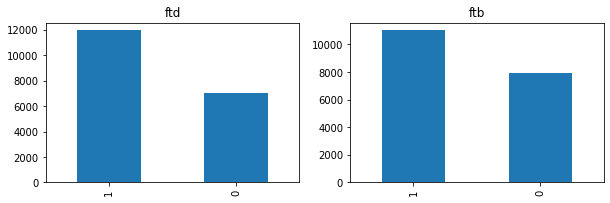

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df_graph['ftd'].value_counts().plot(kind='bar', 
                                     title='ftd')
plt.subplot2grid(fig_dims, (0, 1))
df_graph['ftb'].value_counts().plot(kind='bar', 
                                     title='ftb')

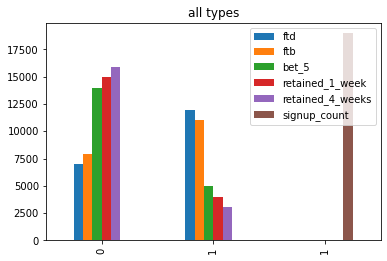

In [98]:
df_graph.apply(pd.value_counts).plot(kind='bar', 
                                     title='all types')

No handles with labels found to put in legend.


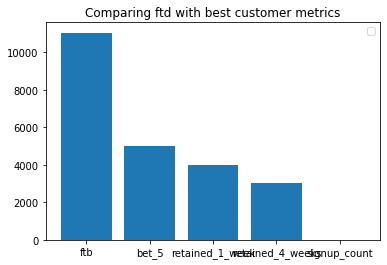

In [99]:
ftd = {}
for col in headers:
    ftd[col] = np.sum(df_graph.ftd[df_graph[col] == 1])
ftd.pop('ftd', None)
plt.bar(range(len(ftd)), ftd.values(), align='center')
plt.xticks(range(len(ftd)), ftd.keys())
plt.title("Comparing ftd with best customer metrics")
plt.legend(loc='best')
plt.show()

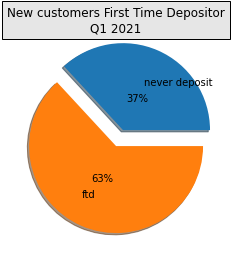

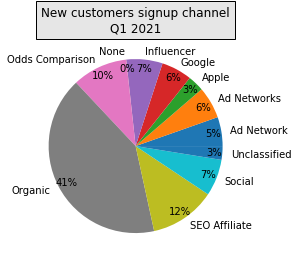

In [217]:
import matplotlib.pyplot as plt
import numpy as np

b = df_graph.ftd.sum()
a = df_graph.signup_count.count() - b

x = np.array([a, b])

plt.figure(0)
mylabels = ["never deposit", "ftd"]
myexplode = [0.2, 0]
plt.pie(x, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
#plt.legend(title = "Player quality metrics:")
plt.title("New customers First Time Depositor\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(1)
size_channel = df_j.groupby('signup_channel').size()
size_channel.plot.pie(figsize=(4,4), autopct='%1.0f%%', pctdistance=0.9)
plt.title("New customers signup channel\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("")

plt.show()

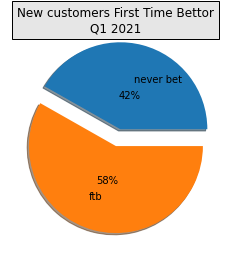

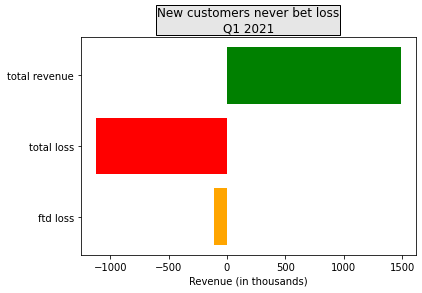

In [269]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
d = df_graph.ftb.sum()
c = df_graph.signup_count.count() - d
y = np.array([c, d])

mylabels = ["never bet", "ftb"]
myexplode = [0.2, 0]
plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers First Time Bettor\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(1)
g = ftd_loss / 1000
h = tot_neg / 1000
i = pos_revenue / 1000

x = ["ftd loss", "total loss", "total revenue"]
y = np.array([g, h, i])
plt.barh(x, y, color=['orange', 'red', 'green'])

# for index, value in enumerate(y):
#     plt.text(value, index, str(value))

plt.title("New customers never bet loss\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':1})
plt.xlabel("Revenue (in thousands)")

plt.show()

In [ ]:
f = df_graph.bet_5.sum()
e = df_graph.signup_count.count() - f

z = np.array([e, f])

plt.figure(0)
mylabels = ["less than 5 bets", "bet 5"]
myexplode = [0.2, 0]
plt.pie(z, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers 5+ bets\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.show()